In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import pearsonr
import math

In [56]:
company_sa = pd.read_csv(r'C:\Users\noahk\company_sa_21.csv')

In [57]:
company_sa

,Unnamed: 0,business,avg_twit_polarity,avg_news_polarity,avg_polarity,avg_twit_subjectivity,avg_news_subjectivity,max_twit_polarities,max_twit_text,max_news_polarities,max_news_title,max_news_keywords,min_twit_polarities,min_twit_text,min_news_polarity,min_news_title,min_news_keywords
0,0,Walmart,0.041710,0.109596,0.075653,0.217693,0.354070,0.5 0.8 0.5,"walgreens: bellevue, blair, columbus, fremont,...",0.20999999999999996 0.2531084656084656 0.31666...,Police respond to shots fired at Beech Grove W...,"[['fired', 'beech', 'suspect', 'minor', 'tryin...",-0.6 -0.5 -0.4,rt @qasimrashid: tw elder abuse\n\nthis is rag...,-0.05625 -0.14986111111111108 0.0,Thomas Rhett tour coming to the Walmart AMP - ...,"[['rhett', 'sale', 'road', 'amp', 'tickets', '..."
1,1,Amazon,0.031813,0.169450,0.100632,0.128812,0.454728,0.65 0.7 1.0,rt @rishaaaaaaa_: streaming on spotify and ama...,0.33055555555555555 0.41385281385281386 0.3498...,10 of Jessica Alba's Favorite Amazon Home Prod...,"[['thousands', 'vacuum', 'jessica', 'users', '...",-1.0 -0.5 -0.3125,rt @holiday_houryuj: (*」&gt;д&lt;)」ｵｫ───ｲ!!\n\...,0.0 -0.12121212121212119 0.0321055381400209,Amazon told it must address pay inequities | N...,"[['website', 'inequities', 'subscription', 'co..."
2,2,Exxon Mobil,0.079331,0.072307,0.075819,0.338149,0.444209,0.6 0.75 0.8,rt @drafzalniaz: the four horsemen of banking ...,0.1584615384615385 0.16718761690983913 0.20857...,Exxon Mobil Corp. stock underperforms Wednesda...,"[['stock', 'underperforms', 'despite', 'mobil'...",-0.5 -0.5 -0.2,wecan: oil &amp; $\n\n8 #fossilfuel co’s are w...,-0.1 -0.04000000000000001 -0.03084415584415584,Exxon Mobil: A Climate Change Winner - Seeking...,"[['change', 'stock', 'configurationis', 'site'..."
3,3,Apple,0.032285,0.159517,0.095901,0.145171,0.447284,1.0 1.0 1.0,i'm gifting you doosra card for paytm cricket ...,0.2692929292929293 0.35481060606060616 0.5,Apple's Worldwide Developers Conference is bac...,"[['challenge', 'student', 'format', 'learn', '...",-0.5 -0.75 -0.4,rt @saynotosino: australia prepares for 'worst...,0.016284695696460395 0.015318772136953958 0.06...,Developers claim that Apple's privacy-first fe...,"[['bomb', 'claim', 'tracking', 'targeted', 'ab..."
4,4,CVS Health,0.261230,0.122886,0.192058,0.446915,0.469504,0.6000000000000001 0.625 0.875,this job might be a great fit for you: pharmac...,0.21809991809991808 0.23038720538720536 0.2705...,CVS Health to Administer No-Cost COVID-19 Vacc...,"[['covid19', 'locations', 'arkansas', 'adminis...",-0.25 -0.21666666666666667 -0.05,"don't be shy. score a job like ""technical supp...",0.03468648751667618 0.018844696969696963 0.040...,CVS Health (CVS) Gains As Market Dips: What Yo...,"[['ratio', 'industry', 'rank', 'revisions', 'r..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,Northrop Grumman,0.044201,0.162379,0.103290,0.141154,0.449329,0.5 0.5 0.75,an overwhelming majority of americans favor en...,0.2625 0.35 0.35,Northrop Grumman wins missile defense contract...,"[['defense', 'raytheon', 'grumman', 'wins', 'b...",-0.2 -0.35 -0.35,rt @theapogeereport: after the cancellation of...,0.07069023569023568 0.013141025641025643 0.097...,"Northrop Grumman robotic MEV-2 spacecraft, in ...","[['satellite', 'spacecraft', 'mev2', 'grumman'..."
96,96,Capital One Financial,0.212082,0.100178,0.156130,0.310661,0.350793,0.9 0.9 1.0,proud to announce that capital one was named a...,0.2129844696969698 0.22353326498063344 0.43333...,How my family used the Capital One Venture Rew...,"[['miles', 'capital', 'credit', 'save', 'ventu...",-0.4 -0.75 -0.5,#9 - leaving no one behind:\n\nintroduce an up...,-0.08 -0.003333333333333332 -0.011666666666666665,Capital One Financial Corp. stock falls Tuesda...,"[['stock', 'underperforms', 'capital', 'dow', ..."
97,97,Plains GP Holdings,0.000000,0.044031,0.022015,0.231250,0.417530,0.0 0.0 0.0,$pagp / plains gp holdings files form def 14a ...,0.12993539678927674 0.16776952214452212 0.4,Plains GP Holdings LP (PAGP) Q

In [58]:
fortune_1000 = pd.read_csv('fortune1000_2021.csv')

In [59]:
fortune_1000 = fortune_1000[:100]

In [7]:
fortune_1000 = fortune_1000.rename({'title':'business'})

In [60]:
fortune_1000

,company,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,prev_rank,CEO,Website,Ticker,Market Cap
0,Walmart,1,0.0,523964.0,14881.0,2200000,Retailing,Bentonville,AR,no,no,no,yes,1.0,C. Douglas McMillon,https://www.stock.walmart.com,WMT,411690
1,Amazon,2,3.0,280522.0,11588.0,798000,Retailing,Seattle,WA,no,yes,no,yes,5.0,Jeffrey P. Bezos,https://www.amazon.com,AMZN,1637405
2,Exxon Mobil,3,-1.0,264938.0,14340.0,74900,Energy,Irving,TX,no,no,no,yes,2.0,Darren W. Woods,https://www.exxonmobil.com,XOM,177923
3,Apple,4,-1.0,260174.0,55256.0,137000,Technology,Cupertino,CA,no,no,no,yes,3.0,Timothy D. Cook,https://www.apple.com,AAPL,2221176
4,CVS Health,5,3.0,256776.0,6634.0,290000,Health Care,Woonsocket,RI,no,no,yes,yes,8.0,Karen S. Lynch,https://www.cvshealth.com,CVS,98496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Northrop Grumman,96,12.0,33841.0,2248.0,90000,Aerospace & Defense,Falls Church,VA,no,no,yes,yes,108.0,Kathy J. Warden,https://www.northropgrumman.com,NOC,49812
96,Capital One Financial,97,1.0,33766.0,5546.0,51900,Financials,McLean,VA,no,yes,no,yes,98.0,Richard D. Fairbank,https://www.capitalone.com,COF,50946
97,Plains GP Holdings,98,-4.0,33669.0,331.0,5000,Energy,Houston,TX,no,no,no,yes,94.0,Wilfred C.W. Chiang,https://www.plainsallamerican.com,PAGP,1463
98,AbbVie,99,-3.0,33266.0,7882.0,30000,Health Care,North Chicago,IL,no,no,no,yes,96.0,Richard A. Gonzalez,https://www.abbvie.com,ABBV,198828


In [61]:
overall_df = fortune_1000.join(company_sa)

In [147]:
overall_df

,company,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,...,max_twit_polarities,max_twit_text,max_news_polarities,max_news_title,max_news_keywords,min_twit_polarities,min_twit_text,min_news_polarity,min_news_title,min_news_keywords
0,Walmart,1,0.0,523964.0,14881.0,2200000,Retailing,Bentonville,AR,no,...,0.5 0.8 0.5,"walgreens: bellevue, blair, columbus, fremont,...",0.20999999999999996 0.2531084656084656 0.31666...,Police respond to shots fired at Beech Grove W...,"[['fired', 'beech', 'suspect', 'minor', 'tryin...",-0.6 -0.5 -0.4,rt @qasimrashid: tw elder abuse\n\nthis is rag...,-0.05625 -0.14986111111111108 0.0,Thomas Rhett tour coming to the Walmart AMP - ...,"[['rhett', 'sale', 'road', 'amp', 'tickets', '..."
1,Amazon,2,3.0,280522.0,11588.0,798000,Retailing,Seattle,WA,no,...,0.65 0.7 1.0,rt @rishaaaaaaa_: streaming on spotify and ama...,0.33055555555555555 0.41385281385281386 0.3498...,10 of Jessica Alba's Favorite Amazon Home Prod...,"[['thousands', 'vacuum', 'jessica', 'users', '...",-1.0 -0.5 -0.3125,rt @holiday_houryuj: (*」&gt;д&lt;)」ｵｫ───ｲ!!\n\...,0.0 -0.12121212121212119 0.0321055381400209,Amazon told it must address pay inequities | N...,"[['website', 'inequities', 'subscription', 'co..."
2,Exxon Mobil,3,-1.0,264938.0,14340.0,74900,Energy,Irving,TX,no,...,0.6 0.75 0.8,rt @drafzalniaz: the four horsemen of banking ...,0.1584615384615385 0.16718761690983913 0.20857...,Exxon Mobil Corp. stock underperforms Wednesda...,"[['stock', 'underperforms', 'despite', 'mobil'...",-0.5 -0.5 -0.2,wecan: oil &amp; $\n\n8 #fossilfuel co’s are w...,-0.1 -0.04000000000000001 -0.03084415584415584,Exxon Mobil: A Climate Change Winner - Seeking...,"[['change', 'stock', 'configurationis', 'site'..."
3,Apple,4,-1.0,260174.0,55256.0,137000,Technology,Cupertino,CA,no,...,1.0 1.0 1.0,i'm gifting you doosra card for paytm cricket ...,0.2692929292929293 0.35481060606060616 0.5,Apple's Worldwide Developers Conference is bac...,"[['challenge', 'student', 'format', 'learn', '...",-0.5 -0.75 -0.4,rt @saynotosino: australia prepares for 'worst...,0.016284695696460395 0.015318772136953958 0.06...,Developers claim that Apple's privacy-first fe...,"[['bomb', 'claim', 'tracking', 'targeted', 'ab..."
4,CVS Health,5,3.0,256776.0,6634.0,290000,Health Care,Woonsocket,RI,no,...,0.6000000000000001 0.625 0.875,this job might be a great fit for you: pharmac...,0.21809991809991808 0.23038720538720536 0.2705...,CVS Health to Administer No-Cost COVID-19 Vacc...,"[['covid19', 'locations', 'arkansas', 'adminis...",-0.25 -0.21666666666666667 -0.05,"don't be shy. score a job like ""technical supp...",0.03468648751667618 0.018844696969696963 0.040...,CVS Health (CVS) Gains As Market Dips: What Yo...,"[['ratio', 'industry', 'rank', 'revisions', 'r..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Northrop Grumman,96,12.0,33841.0,2248.0,90000,Aerospace & Defense,Falls Church,VA,no,...,0.5 0.5 0.75,an overwhelming majority of americans favor en...,0.2625 0.35 0.35,Northrop Grumman wins missile defense contract...,"[['defense', 'raytheon', 'grumman', 'wins', 'b...",-0.2 -0.35 -0.35,rt @theapogeereport: after the cancellation of...,0.07069023569023568 0.013141025641025643 0.097...,"Northrop Grumman robotic MEV-2 spacecraft, in ...","[['satellite', 'spacecraft', 'mev2', 'grumman'..."
96,Capital One Financial,97,1.0,33766.0,5546.0,51900,Financials,McLean,VA,no,...,0.9 0.9 1.0,proud to announce that capital one was named a...,0.2129844696969698 0.22353326498063344 0.43333...,How my family used the Capital One Venture Rew...,"[['miles', 'capital', 'credit', 'save', 'ventu...",-0.4 -0.75 -0.5,#9 - leaving no one behind:\n\nintroduce an up...,-0.08 -0.003333333333333332 -0.011666666666666665,Capital One Financial Corp. stock falls Tuesda...,"[['stock', 'underperforms', 'capital', 'dow', ..."
97,Plains GP Holdings,98,-4.0,33669.0,331.0,5000,Energy,Houston,TX,no,...,0.0 0.0 0.0,$pagp / plains gp holdings files

In [11]:
np.unique(overall_df['Sector'],return_counts=True)

(array(['Aerospace &  Defense', 'Apparel', 'Chemicals', 'Energy',
        'Financials', 'Food &  Drug Stores', 'Food, Beverages &  Tobacco',
        'Health Care', 'Household Products', 'Industrials', 'Media',
        'Motor Vehicles &  Parts', 'Retailing', 'Technology',
        'Telecommunications', 'Transportation', 'Wholesalers'],
       dtype=object),
 array([ 4,  1,  1, 10, 21,  5,  5, 12,  1,  4,  2,  2,  8, 10,  4,  5,  5],
       dtype=int64))

In [62]:
numeric = overall_df[['rank','revenue','profit','num. of employees','Market Cap','avg_twit_polarity',
       'avg_news_polarity', 'avg_polarity', 'avg_twit_subjectivity',
       'avg_news_subjectivity']]

In [63]:
numeric = numeric.rename(columns = {'num. of employees':'num_employees','Market Cap':"mkt_cap"})

In [64]:
numeric = numeric.replace('%','', regex=True)
numeric = numeric.replace('\$','', regex=True)
numeric = numeric.replace(',','', regex=True)
numeric = numeric.replace('\(','', regex=True)
numeric = numeric.replace('\)','', regex=True)
numeric = numeric.replace('-',np.nan, regex=True)

In [65]:
numeric

,rank,revenue,profit,num_employees,mkt_cap,avg_twit_polarity,avg_news_polarity,avg_polarity,avg_twit_subjectivity,avg_news_subjectivity
0,1,523964.0,14881.0,2200000,411690,0.041710,0.109596,0.075653,0.217693,0.354070
1,2,280522.0,11588.0,798000,1637405,0.031813,0.169450,0.100632,0.128812,0.454728
2,3,264938.0,14340.0,74900,177923,0.079331,0.072307,0.075819,0.338149,0.444209
3,4,260174.0,55256.0,137000,2221176,0.032285,0.159517,0.095901,0.145171,0.447284
4,5,256776.0,6634.0,290000,98496,0.261230,0.122886,0.192058,0.446915,0.469504
...,...,...,...,...,...,...,...,...,...,...
95,96,33841.0,2248.0,90000,49812,0.044201,0.162379,0.103290,0.141154,0.449329
96,97,33766.0,5546.0,51900,50946,0.212082,0.100178,0.156130,0.310661,0.350793
97,98,33669.0,331.0,5000,1463,0.000000,0.044031,0.022015,0.231250,0.417530
98,99,33266.0,7882.0,30000,198828,0.045278,0.088460,0.066869,0.192039,0.435170


In [66]:
numeric = numeric.apply(pd.to_numeric)

In [67]:
numeric['media_sentiment_difference'] = numeric['avg_twit_polarity'] - numeric['avg_news_polarity']

In [68]:
numeric['avg_subjectivity'] = (numeric['avg_twit_subjectivity'] + numeric['avg_news_subjectivity'])/2

In [69]:
numeric['media_sentiment_intensity'] = abs(numeric['avg_twit_polarity']) + abs(numeric['avg_news_polarity'])

In [70]:
numeric['sector'] = overall_df['sector']

In [156]:
numeric_dummies = pd.get_dummies(numeric)

In [72]:
for col in numeric_dummies:
    if sum(numeric_dummies[col]) <=3:
        numeric_dummies = numeric_dummies.drop(columns=[col])
        
numeric_dummies

,rank,revenue,profit,num_employees,mkt_cap,avg_twit_polarity,avg_news_polarity,avg_polarity,avg_twit_subjectivity,avg_news_subjectivity,...,sector_Energy,sector_Financials,sector_Food & Drug Stores,"sector_Food, Beverages & Tobacco",sector_Health Care,sector_Industrials,sector_Retailing,sector_Technology,sector_Telecommunications,sector_Transportation
0,1,523964.0,14881.0,2200000,411690.0,0.041710,0.109596,0.075653,0.217693,0.354070,...,0,0,0,0,0,0,1,0,0,0
1,2,280522.0,11588.0,798000,1637405.0,0.031813,0.169450,0.100632,0.128812,0.454728,...,0,0,0,0,0,0,1,0,0,0
2,3,264938.0,14340.0,74900,177923.0,0.079331,0.072307,0.075819,0.338149,0.444209,...,1,0,0,0,0,0,0,0,0,0
3,4,260174.0,55256.0,137000,2221176.0,0.032285,0.159517,0.095901,0.145171,0.447284,...,0,0,0,0,0,0,0,1,0,0
4,5,256776.0,6634.0,290000,98496.0,0.261230,0.122886,0.192058,0.446915,0.469504,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,33841.0,2248.0,90000,49812.0,0.044201,0.162379,0.103290,0.141154,0.449329,...,0,0,0,0,0,0,0,0,0,0
96,97,33766.0,5546.0,51900,50946.0,0.212082,0.100178,0.156130,0.310661,0.350793,...,0,1,0,0,0,0,0,0,0,0
97,98,33669.0,331.0,5000,1463.0,0.000000,0.044031,0.022015,0.231250,0.417530,...,1,0,0,0,0,0,0,0,0,0
98,99,33266.0,7882.0,30000,198828.0,0.045278,0.088460,0.066869,0.192039,0.435170,...,0,0,0,0,1,0,0,0,0,0


In [75]:
# gender = pd.read_csv('ceo_gender21.csv')
# numeric_dummies = numeric_dummies.join(gender)
# nd = numeric_dummies.drop(columns=['Unnamed: 0'])
# nd
# nd = numeric_dummies.drop(columns=['Unnamed: 0'])
nd.to_csv('nd21.csv')

In [76]:
numeric

,rank,revenue,profit,num_employees,mkt_cap,avg_twit_polarity,avg_news_polarity,avg_polarity,avg_twit_subjectivity,avg_news_subjectivity,media_sentiment_difference,avg_subjectivity,media_sentiment_intensity,sector
0,1,523964.0,14881.0,2200000,411690.0,0.041710,0.109596,0.075653,0.217693,0.354070,-0.067886,0.285882,0.151306,Retailing
1,2,280522.0,11588.0,798000,1637405.0,0.031813,0.169450,0.100632,0.128812,0.454728,-0.137637,0.291770,0.201264,Retailing
2,3,264938.0,14340.0,74900,177923.0,0.079331,0.072307,0.075819,0.338149,0.444209,0.007024,0.391179,0.151638,Energy
3,4,260174.0,55256.0,137000,2221176.0,0.032285,0.159517,0.095901,0.145171,0.447284,-0.127232,0.296228,0.191802,Technology
4,5,256776.0,6634.0,290000,98496.0,0.261230,0.122886,0.192058,0.446915,0.469504,0.138343,0.458209,0.384116,Health Care
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,33841.0,2248.0,90000,49812.0,0.044201,0.162379,0.103290,0.141154,0.449329,-0.118178,0.295242,0.206580,Aerospace & Defense
96,97,33766.0,5546.0,51900,50946.0,0.212082,0.100178,0.156130,0.310661,0.350793,0.111904,0.330727,0.312260,Financials
97,98,33669.0,331.0,5000,1463.0,0.000000,0.044031,0.022015,0.231250,0.417530,-0.044031,0.324390,0.044031,Energy
98,99,33266.0,7882.0,30000,198828.0,0.045278,0.088460,0.066869,0.192039,0.435170,-0.043182,0.313605,0.133738,Health Care


rank


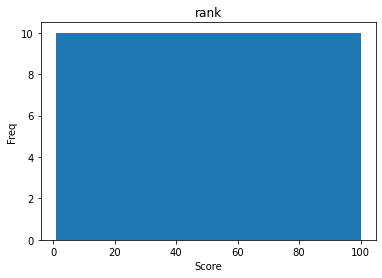

revenue


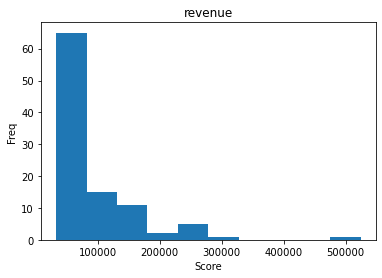

profit


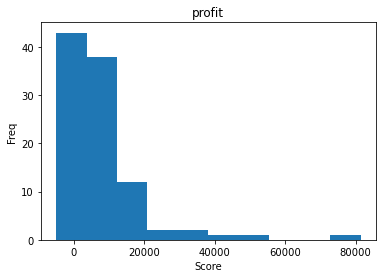

num_employees


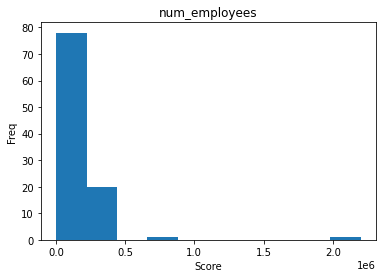

mkt_cap


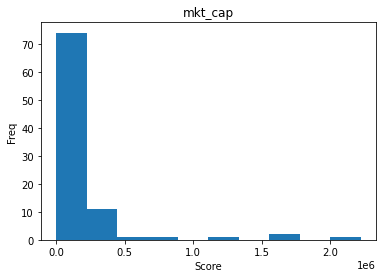

avg_twit_polarity


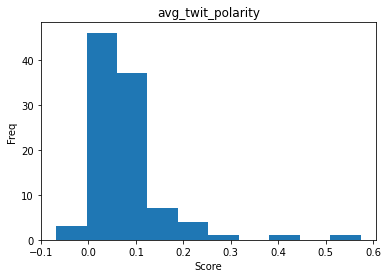

avg_news_polarity


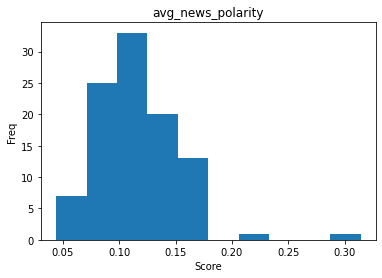

avg_polarity


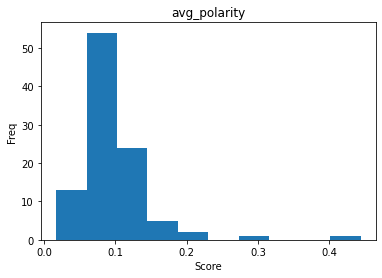

avg_twit_subjectivity


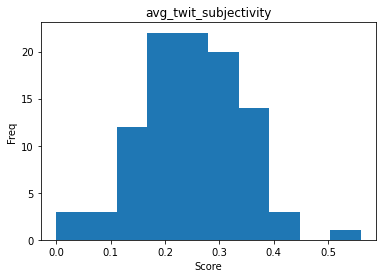

avg_news_subjectivity


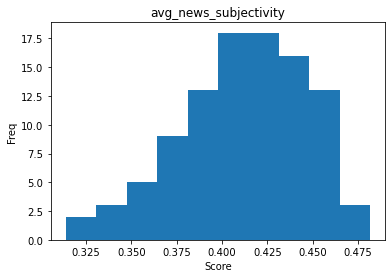

media_sentiment_difference


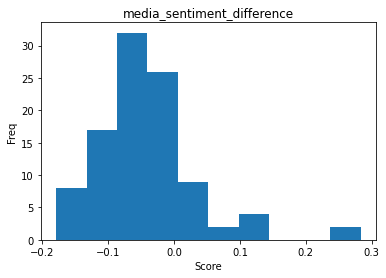

avg_subjectivity


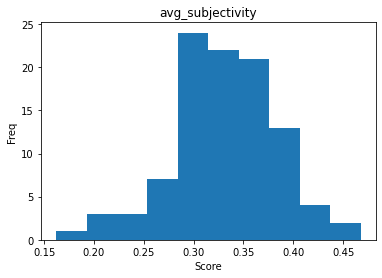

media_sentiment_intensity


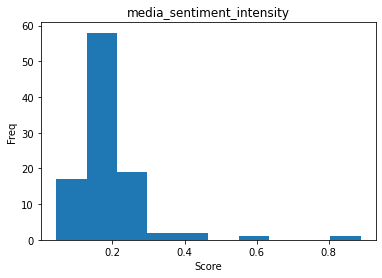

In [77]:
for col in numeric.drop(columns=['sector']):
    print(col)
    plt.hist(numeric[col])
    plt.xlabel('Score')
    plt.ylabel('Freq')
    plt.title(col)
    plt.show()

In [79]:
nd['media_sentiment_difference'] = numeric['media_sentiment_difference']
corr = nd.corr()
corr = corr.style.background_gradient(cmap='coolwarm')
corr
#note: news subjectivity and polarity w profit change, market value, revenue change, etc RANK
# polarity and revenue change
# twitter and revenue change, twit polarity and profit change

,rank,revenue,profit,num_employees,mkt_cap,avg_twit_polarity,avg_news_polarity,avg_polarity,avg_twit_subjectivity,avg_news_subjectivity,avg_subjectivity,media_sentiment_intensity,sector_Aerospace & Defense,sector_Energy,sector_Financials,sector_Food & Drug Stores,"sector_Food, Beverages & Tobacco",sector_Health Care,sector_Industrials,sector_Retailing,sector_Technology,sector_Telecommunications,sector_Transportation,ceo_gender,media_sentiment_difference
rank,1.000000,-0.793928,-0.404778,-0.377442,-0.357889,0.051052,0.106403,0.079556,-0.065716,-0.235483,-0.135149,0.091650,0.099345,0.034643,0.158985,-0.031821,0.123750,-0.192689,0.121982,-0.159619,-0.118940,-0.130821,0.081860,-0.049655,0.002419
revenue,-0.793928,1.000000,0.428546,0.694349,0.418584,0.001416,-0.037395,-0.012541,0.061111,0.179245,0.112684,-0.022071,-0.105768,0.014508,-0.147336,-0.004710,-0.106456,0.165978,-0.097095,0.287207,0.044253,0.071336,-0.110002,0.018680,0.020210
profit,-0.404778,0.428546,1.000000,0.181158,0.663561,-0.026949,0.061603,0.001052,-0.104481,0.167083,-0.037803,-0.009756,-0.093253,-0.118651,0.163498,-0.103570,-0.056118,-0.060169,-0.095998,-0.035375,0.362796,0.067380,-0.102767,0.048098,-0.060071
num_employees,-0.377442,0.694349,0.181158,1.000000,0.216709,-0.010968,0.032848,0.003270,0.007090,-0.018292,0.000291,-0.004942,-0.012025,-0.174279,-0.165654,0.122104,-0.017750,-0.070030,-0.025865,0.520714,-0.023262,0.010823,0.060134,-0.007759,-0.028331
mkt_cap,-0.357889,0.418584,0.663561,0.216709,1.000000,-0.066849,0.158573,0.004782,-0.147182,0.268044,-0.043156,0.002814,-0.077462,-0.135853,-0.092015,-0.086261,-0.046074,-0.072904,-0.055121,0.142107,0.474627,0.005884,-0.095995,0.101940,-0.153581
avg_twit_polarity,0.051052,0.001416,-0.026949,-0.010968,-0.066849,1.000000,0.398369,0.942124,0.590209,0.130594,0.564902,0.929686,-0.034996,0.003766,-0.020464,0.105620,-0.100843,0.024153,-0.044196,0.250564,-0.138574,0.048964,-0.042446,-0.195592,0.889001
avg_news_polarity,0.106403,-0.037395,0.061603,0.032848,0.158573,0.398369,1.000000,0.682826,0.031849,0.288892,0.122650,0.684596,0.023069,-0.286760,0.107580,0.015921,-0.094765,-0.081762,0.016066,0.240332,0.141124,0.013722,-0.182398,-0.303536,-0.065852
avg_polarity,0.079556,-0.012541,0.001052,0.003270,0.004782,0.942124,0.682826,1.000000,0.481750,0.209616,0.494782,0.990740,-0.019443,-0.101817,0.023023,0.089947,-0.114962,-0.010648,-0.029330,0.287423,-0.058792,0.044016,-0.100479,-0.266740,0.684030
avg_twit_subjectivity,-0.065716,0.061111,-0.104481,0.007090,-0.147182,0.590209,0.031849,0.481750,1.000000,0.190537,0.947072,0.495327,-0.024815,0.094776,-0.107056,0.130378,-0.125933,0.080354,0.060151,0.121770,-0.181929,0.175104,-0.063271,-0.198088,0.626176
avg_news_subjectivity,-0.235483,0.179245,0.167083,-0.018292,0.268044,0.130594,0.288892,0.209616,0.190537,1.000000,0.495592,0.181862,0.020995,0.102967,-0.439550,0.034229,0.060889,0.115596,0.090453,0.144779,0.214211,0.018854,-0.305255,-0.180943,-0.002152


In [80]:
business_df = nd.drop(columns = ['avg_twit_polarity', 'avg_news_polarity','avg_polarity','avg_twit_subjectivity','avg_news_subjectivity','avg_subjectivity','media_sentiment_difference','media_sentiment_intensity'])

In [111]:
sentiment_df = nd[['avg_twit_polarity', 'avg_news_polarity','avg_twit_subjectivity','avg_news_subjectivity']]

### Next direction: create dummy variables for things like sector, NLP predict on ceo gender for dummy variables for correlation create linear regression model(s) of some top correlating features, compare across industries and qualitative stuff, output keyword information

0
Feature: 0, Score: 0.00088
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: -0.00000
Feature: 4, Score: -0.00000
Feature: 5, Score: -0.01124
Feature: 6, Score: -0.00272
Feature: 7, Score: -0.00324
Feature: 8, Score: 0.08937
Feature: 9, Score: -0.02231
Feature: 10, Score: 0.00880
Feature: 11, Score: -0.00023
Feature: 12, Score: 0.13306
Feature: 13, Score: -0.01710
Feature: 14, Score: 0.04117
Feature: 15, Score: 0.00993
Feature: 16, Score: -0.05253


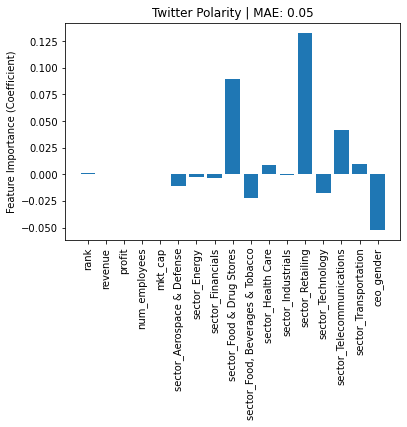

1
Feature: 0, Score: 0.00007
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: -0.00000
Feature: 4, Score: -0.00000
Feature: 5, Score: -0.00688
Feature: 6, Score: 0.04272
Feature: 7, Score: 0.00221
Feature: 8, Score: 0.09920
Feature: 9, Score: -0.02460
Feature: 10, Score: 0.02831
Feature: 11, Score: 0.05953
Feature: 12, Score: 0.08413
Feature: 13, Score: -0.01872
Feature: 14, Score: 0.10758
Feature: 15, Score: -0.00240
Feature: 16, Score: -0.07320


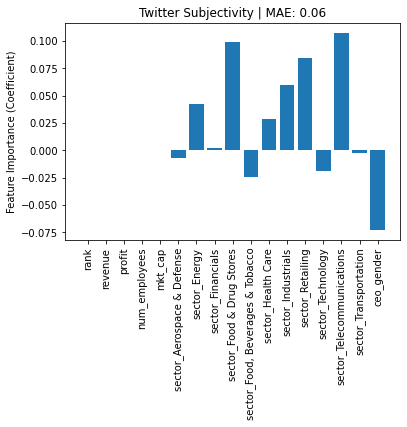

2
Feature: 0, Score: 0.00038
Feature: 1, Score: 0.00000
Feature: 2, Score: -0.00000
Feature: 3, Score: -0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: -0.00796
Feature: 6, Score: -0.03329
Feature: 7, Score: 0.00528
Feature: 8, Score: 0.01462
Feature: 9, Score: -0.01597
Feature: 10, Score: -0.00853
Feature: 11, Score: 0.00370
Feature: 12, Score: 0.04011
Feature: 13, Score: 0.01343
Feature: 14, Score: 0.01096
Feature: 15, Score: -0.02998
Feature: 16, Score: -0.03786


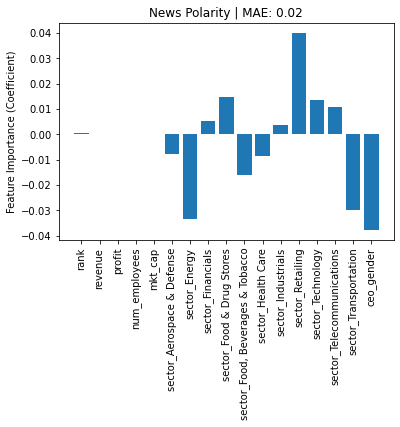

3
Feature: 0, Score: -0.00012
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: -0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: -0.01594
Feature: 6, Score: -0.00509
Feature: 7, Score: -0.04631
Feature: 8, Score: 0.00203
Feature: 9, Score: 0.00140
Feature: 10, Score: -0.01096
Feature: 11, Score: 0.00725
Feature: 12, Score: 0.01368
Feature: 13, Score: -0.00720
Feature: 14, Score: -0.01547
Feature: 15, Score: -0.05633
Feature: 16, Score: -0.02724


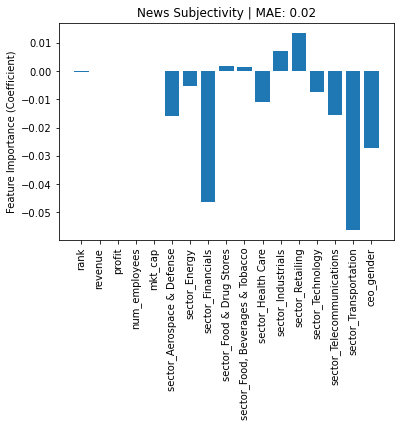

4
Feature: 0, Score: 0.00050
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: -0.00000
Feature: 4, Score: -0.00000
Feature: 5, Score: -0.00328
Feature: 6, Score: 0.03057
Feature: 7, Score: -0.00851
Feature: 8, Score: 0.07475
Feature: 9, Score: -0.00634
Feature: 10, Score: 0.01733
Feature: 11, Score: -0.00394
Feature: 12, Score: 0.09295
Feature: 13, Score: -0.03053
Feature: 14, Score: 0.03021
Feature: 15, Score: 0.03991
Feature: 16, Score: -0.01466


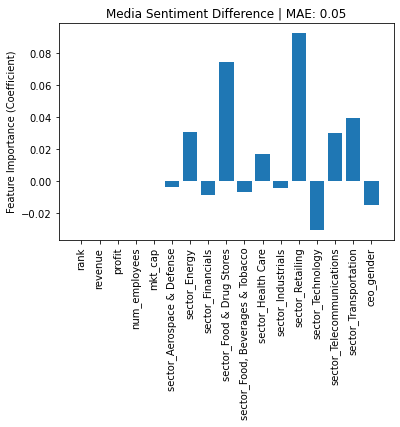

    rank   revenue   profit  num_employees    mkt_cap  \
0      1  523964.0  14881.0        2200000   411690.0   
1      2  280522.0  11588.0         798000  1637405.0   
2      3  264938.0  14340.0          74900   177923.0   
3      4  260174.0  55256.0         137000  2221176.0   
4      5  256776.0   6634.0         290000    98496.0   
..   ...       ...      ...            ...        ...   
95    96   33841.0   2248.0          90000    49812.0   
96    97   33766.0   5546.0          51900    50946.0   
97    98   33669.0    331.0           5000     1463.0   
98    99   33266.0   7882.0          30000   198828.0   
99   100   32897.0     85.1           2012      988.0   

    sector_Aerospace & Defense  sector_Energy  sector_Financials  \
0                            0              0                  0   
1                            0              0                  0   
2                            0              1                  0   
3                            0             

In [145]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
X = business_df.fillna(business_df.mean())
y_twitter_polarity = nd['avg_twit_polarity']
y_twitter_subjectivity = nd['avg_twit_subjectivity']
y_news_polarity = nd['avg_news_polarity']
y_news_subjectivity = nd['avg_news_subjectivity']
y_msd = nd['media_sentiment_difference']
labels = list(X.columns)
titles = ['Twitter Polarity','Twitter Subjectivity', 'News Polarity', 'News Subjectivity', 'Media Sentiment Difference']
# define the model
c = 0
for y in [y_twitter_polarity, y_twitter_subjectivity, y_news_polarity, y_news_subjectivity, y_msd]:
    model = LinearRegression()
    # fit the model
    model.fit(X, y)
    pred = model.predict(X)
    # get importance
    importance = model.coef_
    # summarize feature importance
    print(c)
    for i,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (i,v))
    # plot feature importance
    plt.xticks([x for x in range(len(importance))], labels)
    plt.xticks(rotation = 90)
    plt.bar([x for x in range(len(importance))], importance)
    plt.title(titles[c] + ' | MAE: ' + str(round(mean_absolute_error(y,pred),2)))
    plt.ylabel('Feature Importance (Coefficient)')
    plt.show()
    
    c += 1
print(X)

0
Feature: 0, Score: 16.28583
Feature: 1, Score: 131.71145
Feature: 2, Score: -13.67860
Feature: 3, Score: -234.60519


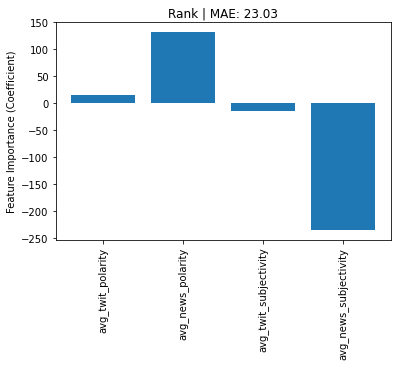

1
Feature: 0, Score: -2954.70086
Feature: 1, Score: -187013.10287
Feature: 2, Score: 21597.05327
Feature: 3, Score: 427478.85623


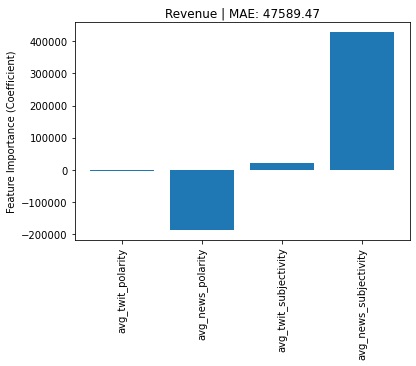

2
Feature: 0, Score: 7768.91076
Feature: 1, Score: -3498.34281
Feature: 2, Score: -21560.38725
Feature: 3, Score: 65961.93492


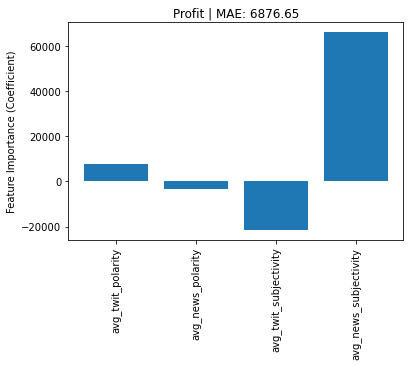

3
Feature: 0, Score: -181221.56900
Feature: 1, Score: 432075.19701
Feature: 2, Score: 124781.11632
Feature: 3, Score: -270827.86403


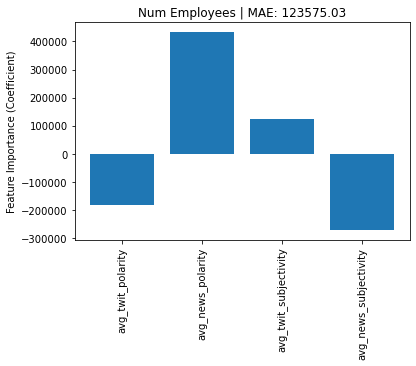

4
Feature: 0, Score: -143461.59891
Feature: 1, Score: 864727.04581
Feature: 2, Score: -623191.20062
Feature: 3, Score: 2566857.18837


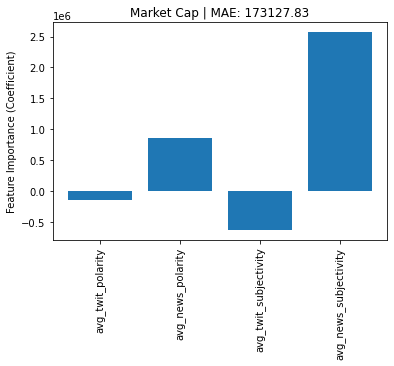

    avg_twit_polarity  avg_news_polarity  avg_twit_subjectivity  \
0            0.041710           0.109596               0.217693   
1            0.031813           0.169450               0.128812   
2            0.079331           0.072307               0.338149   
3            0.032285           0.159517               0.145171   
4            0.261230           0.122886               0.446915   
..                ...                ...                    ...   
95           0.044201           0.162379               0.141154   
96           0.212082           0.100178               0.310661   
97           0.000000           0.044031               0.231250   
98           0.045278           0.088460               0.192039   
99           0.048810           0.140223               0.344048   

    avg_news_subjectivity  
0                0.354070  
1                0.454728  
2                0.444209  
3                0.447284  
4                0.469504  
..                    ...  

In [146]:
X = sentiment_df.fillna(sentiment_df.mean())
y_rank = nd['rank']
y_revenue = nd['revenue']
y_profit = nd['profit']
y_num_employees = nd['num_employees']
y_mktcap = nd['mkt_cap'].fillna(nd['mkt_cap'].mean())
labels = list(X.columns)
titles = ['Rank','Revenue', 'Profit', 'Num Employees', 'Market Cap']
# define the model
c = 0
for y in [y_rank, y_revenue, y_profit, y_num_employees, y_mktcap]:
    model = LinearRegression()
    # fit the model
    model.fit(X, y)
    pred = model.predict(X)
    # get importance
    importance = model.coef_
    # summarize feature importance
    print(c)
    for i,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (i,v))
    # plot feature importance
    plt.xticks([x for x in range(len(importance))], labels)
    plt.xticks(rotation = 90)
    plt.bar([x for x in range(len(importance))], importance)
    plt.title(titles[c] + ' | MAE: ' + str(round(mean_absolute_error(y,pred),2)))
    plt.ylabel('Feature Importance (Coefficient)')
    plt.show()
    
    c += 1
print(X)

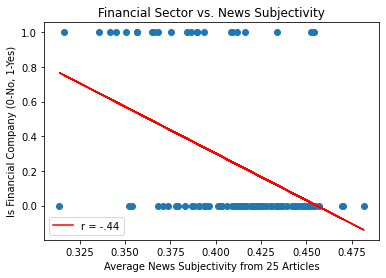

In [132]:
plt.scatter(nd['avg_news_subjectivity'],nd['sector_Financials'])
m, b = np.polyfit(nd['avg_news_subjectivity'], nd['sector_Financials'], 1)
plt.plot(nd['avg_news_subjectivity'], m*nd['avg_news_subjectivity'] + b, color='red',label='r = -.44')
plt.xlabel('Average News Subjectivity from 25 Articles')
plt.ylabel('Is Financial Company (0-No, 1-Yes)')
plt.title('Financial Sector vs. News Subjectivity')
plt.legend()
plt.show()

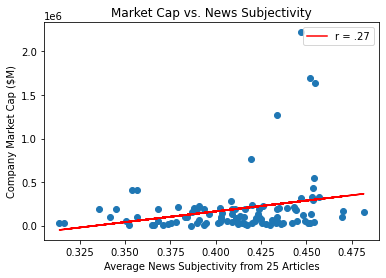

In [128]:
X = np.array(nd['avg_news_subjectivity']).reshape(-1,1)
y = nd['mkt_cap'].fillna(nd['mkt_cap'].mean())
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
intercept = model.intercept_

plt.scatter(nd['avg_news_subjectivity'],nd['mkt_cap'].fillna(nd['mkt_cap'].mean()))
plt.plot(nd['avg_news_subjectivity'],intercept + importance*nd['avg_news_subjectivity'],color='red',label='r = .27')
plt.title("Market Cap vs. News Subjectivity")
plt.xlabel("Average News Subjectivity from 25 Articles")
plt.ylabel("Company Market Cap ($M)")
plt.legend()
plt.show()

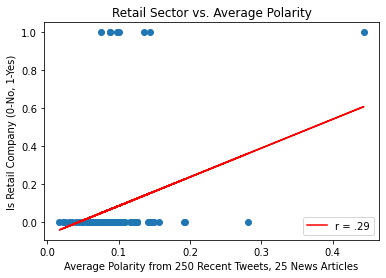

In [134]:
plt.scatter(nd['avg_polarity'],nd['sector_Retailing'])
m, b = np.polyfit(nd['avg_polarity'], nd['sector_Retailing'], 1)
plt.plot(nd['avg_polarity'], m*nd['avg_polarity'] + b, color='red',label='r = .29')
plt.xlabel('Average Polarity from 250 Recent Tweets, 25 News Articles')
plt.ylabel('Is Retail Company (0-No, 1-Yes)')
plt.title('Retail Sector vs. Average Polarity')
plt.legend()
plt.show()

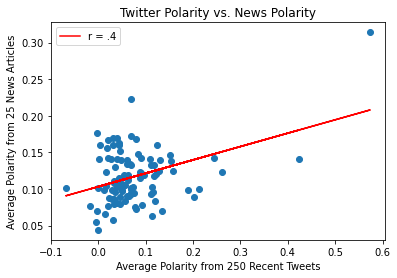

In [135]:
plt.scatter(nd['avg_twit_polarity'],nd['avg_news_polarity'])
m, b = np.polyfit(nd['avg_twit_polarity'], nd['avg_news_polarity'], 1)
plt.plot(nd['avg_twit_polarity'], m*nd['avg_twit_polarity'] + b, color='red',label='r = .4')
plt.xlabel('Average Polarity from 250 Recent Tweets')
plt.ylabel('Average Polarity from 25 News Articles')
plt.title('Twitter Polarity vs. News Polarity')
plt.legend()
plt.show()

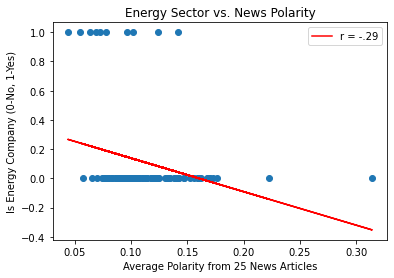

In [139]:
plt.scatter(nd['avg_news_polarity'],nd['sector_Energy'])
m, b = np.polyfit(nd['avg_news_polarity'], nd['sector_Energy'], 1)
plt.plot(nd['avg_news_polarity'], m*nd['avg_news_polarity'] + b, color='red',label='r = -.29')
plt.xlabel('Average Polarity from 25 News Articles')
plt.ylabel('Is Energy Company (0-No, 1-Yes)')
plt.title('Energy Sector vs. News Polarity')
plt.legend()
plt.show()

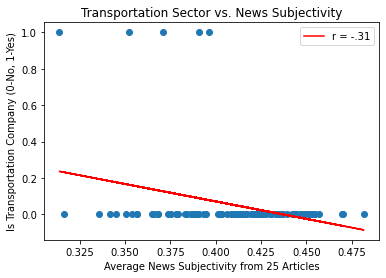

In [140]:
plt.scatter(nd['avg_news_subjectivity'],nd['sector_Transportation'])
m, b = np.polyfit(nd['avg_news_subjectivity'], nd['sector_Transportation'], 1)
plt.plot(nd['avg_news_subjectivity'], m*nd['avg_news_subjectivity'] + b, color='red',label='r = -.31')
plt.xlabel('Average News Subjectivity from 25 Articles')
plt.ylabel('Is Transportation Company (0-No, 1-Yes)')
plt.title('Transportation Sector vs. News Subjectivity')
plt.legend()
plt.show()

In [177]:
sentiment_df = overall_df.drop(columns=['rank','rank_change','revenue','profit','num. of employees','Unnamed: 0'])
sector_df = sentiment_df.groupby(['sector']).mean()

sector_df.drop(sector_df.loc[sector_df.index == 'Chemicals'].index, inplace=True)
sector_df.drop(sector_df.loc[sector_df.index == 'Media'].index, inplace=True)
sector_df.drop(sector_df.loc[sector_df.index == 'Industrials'].index, inplace=True)
sector_df.drop(sector_df.loc[sector_df.index == 'Wholesalers'].index, inplace=True)
sector_df.drop(sector_df.loc[sector_df.index == 'Motor Vehicles & Parts'].index, inplace=True)
sector_df.drop(sector_df.loc[sector_df.index == 'Household Products'].index, inplace=True)
sector_df.drop(sector_df.loc[sector_df.index == 'Apparel'].index, inplace=True)
sector_df.sort_values('avg_polarity')

,avg_twit_polarity,avg_news_polarity,avg_polarity,avg_twit_subjectivity,avg_news_subjectivity
sector,,,,,
"Food, Beverages & Tobacco",0.035679,0.099571,0.067625,0.191474,0.421594
Transportation,0.060922,0.087170,0.074046,0.223549,0.364991
Energy,0.076959,0.084724,0.080842,0.276212,0.421963
Technology,0.042075,0.132846,0.087461,0.198164,0.433560
Aerospace & Defense,0.063575,0.120744,0.092160,0.239310,0.414409
Health Care,0.080927,0.109378,0.095152,0.268204,0.421184
Financials,0.073062,0.124152,0.098607,0.231568,0.384047
Telecommunications,0.095632,0.119495,0.107563,0.330133,0.414438
Food & Drug Stores,0.118306,0.119899,0.119102,0.309533,0.417056


In [178]:
overall_df

,company,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,...,max_twit_polarities,max_twit_text,max_news_polarities,max_news_title,max_news_keywords,min_twit_polarities,min_twit_text,min_news_polarity,min_news_title,min_news_keywords
0,Walmart,1,0.0,523964.0,14881.0,2200000,Retailing,Bentonville,AR,no,...,0.5 0.8 0.5,"walgreens: bellevue, blair, columbus, fremont,...",0.20999999999999996 0.2531084656084656 0.31666...,Police respond to shots fired at Beech Grove W...,"[['fired', 'beech', 'suspect', 'minor', 'tryin...",-0.6 -0.5 -0.4,rt @qasimrashid: tw elder abuse\n\nthis is rag...,-0.05625 -0.14986111111111108 0.0,Thomas Rhett tour coming to the Walmart AMP - ...,"[['rhett', 'sale', 'road', 'amp', 'tickets', '..."
1,Amazon,2,3.0,280522.0,11588.0,798000,Retailing,Seattle,WA,no,...,0.65 0.7 1.0,rt @rishaaaaaaa_: streaming on spotify and ama...,0.33055555555555555 0.41385281385281386 0.3498...,10 of Jessica Alba's Favorite Amazon Home Prod...,"[['thousands', 'vacuum', 'jessica', 'users', '...",-1.0 -0.5 -0.3125,rt @holiday_houryuj: (*」&gt;д&lt;)」ｵｫ───ｲ!!\n\...,0.0 -0.12121212121212119 0.0321055381400209,Amazon told it must address pay inequities | N...,"[['website', 'inequities', 'subscription', 'co..."
2,Exxon Mobil,3,-1.0,264938.0,14340.0,74900,Energy,Irving,TX,no,...,0.6 0.75 0.8,rt @drafzalniaz: the four horsemen of banking ...,0.1584615384615385 0.16718761690983913 0.20857...,Exxon Mobil Corp. stock underperforms Wednesda...,"[['stock', 'underperforms', 'despite', 'mobil'...",-0.5 -0.5 -0.2,wecan: oil &amp; $\n\n8 #fossilfuel co’s are w...,-0.1 -0.04000000000000001 -0.03084415584415584,Exxon Mobil: A Climate Change Winner - Seeking...,"[['change', 'stock', 'configurationis', 'site'..."
3,Apple,4,-1.0,260174.0,55256.0,137000,Technology,Cupertino,CA,no,...,1.0 1.0 1.0,i'm gifting you doosra card for paytm cricket ...,0.2692929292929293 0.35481060606060616 0.5,Apple's Worldwide Developers Conference is bac...,"[['challenge', 'student', 'format', 'learn', '...",-0.5 -0.75 -0.4,rt @saynotosino: australia prepares for 'worst...,0.016284695696460395 0.015318772136953958 0.06...,Developers claim that Apple's privacy-first fe...,"[['bomb', 'claim', 'tracking', 'targeted', 'ab..."
4,CVS Health,5,3.0,256776.0,6634.0,290000,Health Care,Woonsocket,RI,no,...,0.6000000000000001 0.625 0.875,this job might be a great fit for you: pharmac...,0.21809991809991808 0.23038720538720536 0.2705...,CVS Health to Administer No-Cost COVID-19 Vacc...,"[['covid19', 'locations', 'arkansas', 'adminis...",-0.25 -0.21666666666666667 -0.05,"don't be shy. score a job like ""technical supp...",0.03468648751667618 0.018844696969696963 0.040...,CVS Health (CVS) Gains As Market Dips: What Yo...,"[['ratio', 'industry', 'rank', 'revisions', 'r..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Northrop Grumman,96,12.0,33841.0,2248.0,90000,Aerospace & Defense,Falls Church,VA,no,...,0.5 0.5 0.75,an overwhelming majority of americans favor en...,0.2625 0.35 0.35,Northrop Grumman wins missile defense contract...,"[['defense', 'raytheon', 'grumman', 'wins', 'b...",-0.2 -0.35 -0.35,rt @theapogeereport: after the cancellation of...,0.07069023569023568 0.013141025641025643 0.097...,"Northrop Grumman robotic MEV-2 spacecraft, in ...","[['satellite', 'spacecraft', 'mev2', 'grumman'..."
96,Capital One Financial,97,1.0,33766.0,5546.0,51900,Financials,McLean,VA,no,...,0.9 0.9 1.0,proud to announce that capital one was named a...,0.2129844696969698 0.22353326498063344 0.43333...,How my family used the Capital One Venture Rew...,"[['miles', 'capital', 'credit', 'save', 'ventu...",-0.4 -0.75 -0.5,#9 - leaving no one behind:\n\nintroduce an up...,-0.08 -0.003333333333333332 -0.011666666666666665,Capital One Financial Corp. stock falls Tuesda...,"[['stock', 'underperforms', 'capital', 'dow', ..."
97,Plains GP Holdings,98,-4.0,33669.0,331.0,5000,Energy,Houston,TX,no,...,0.0 0.0 0.0,$pagp / plains gp holdings files

0
1
13
25
36
43
74
79
['fired, beech, suspect, minor, trying, grove, respond, walmart, injuries, working, shots, space, finds, park, outdoor, furniture, homes, wicker, walmarts, refresh, patio, set, storage, rattan, gardens, spring, warns, johnson, cards, sheriff, gift, involving, walmart, scam, sheriffs, reports, warrants, outstanding, phone, office, county', 'thousands, vacuum, jessica, users, wont, splurge, set, system, alba, products, spend, favorite, tuo, toprated, revealed, buy, picks, amazon, stunning, space, ratings, pit, 47, outdoor, buy, best, looking, roasting, warmth, relaxing, users, bestseller, right, amazons, sign, echo, sought, announces, version, fit, buds, theoretically, amazon, technology, quality, sound, test', 'm, stock, costco, rose, trading, volume, wholesale, rising, average, market, rises, corp, outperforms, site, ruiz, square, steps, shopping, costco, visiting, wholesale, working, station, college, valley, coming, website, preferences, 0217038, v, repeat, rele

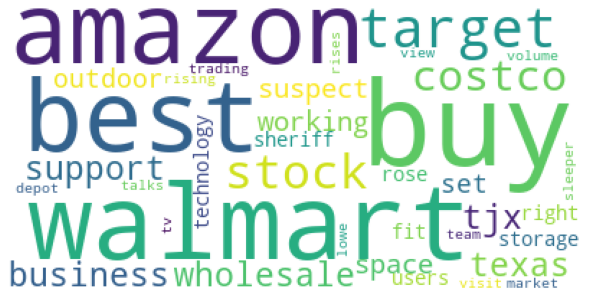

2
14
21
26
31
58
90
92
94
97
['change, stock, configurationis, site, javascript, browser, mobil, current, exxon, disabledyour, climate, winner, compatible, nysexom, stock, losses, despite, mobil, exxon, trading, volume, jones, fell, falling, market, corp, day, competitors, outperforms, relative, stock, bearish, jenkins, mobil, james, stance, negative, exxon, mobils, raymond, longtime, gains, month, backs, past, oil, right', 'stock, chevron, wirths, 2019, tops, 29, million, awards, value, wirth, falls, total, ceo, fell, xle, compensation, 2020, mk, stock, underperforms, chevron, dow, trading, falls, fell, volume, rising, jones, data, market, corp, chevron, oil, drilling, spending, production, exxon, slow, recovery, companies, shale, permian, prices, increase, walk, path', 'stock, underperforms, marathon, trading, falls, fell, petroleum, volume, jones, falling, market, corp, upside, company, refined, products, oil, target, transports, indicates, marketing, 157, petroleum, consensus, refi

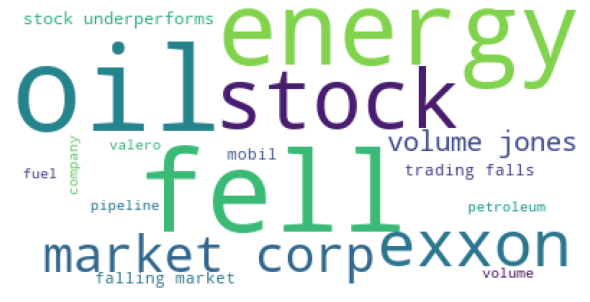

3
10
20
33
37
44
45
57
62
81
['rt @saynotosino: australia prepares for worst case scenario of war with china - daily mail\n\naustralia prepares for war with china \n\n#ausp…, rt @802nowonair: 2021/04/18 13:51\nポニーテイル / ビッケブランカ\n#fm802\n\n●radikoタイムフリーで聴く↓\nhttps://t.co/wlwfgsecty\n\n●itunesで試聴↓https://t.co/v5dh8qumrx, download santa in zombie land from #appstore and share your comments on this #zombie killing #iphone #game #us https://t.co/dvnyrgkx7d', 'rt @nordicinst: artificial intelligence (ai) as a service market: know technology exploding in popularity | alphabet .... #ai #artificialin…, artificial intelligence (ai) as a service market: know technology exploding in popularity | -  https://t.co/vux0tgodw0 #ai #intoainews, artificial intelligence (ai) as a service market: know technology exploding in popularity | alphabet .... #ai… https://t.co/6a5bgydwzl', 'rt @mel168188501bb: and just like that, proof that nancy pelosi is a corrupt government official that needs her wings clipped!

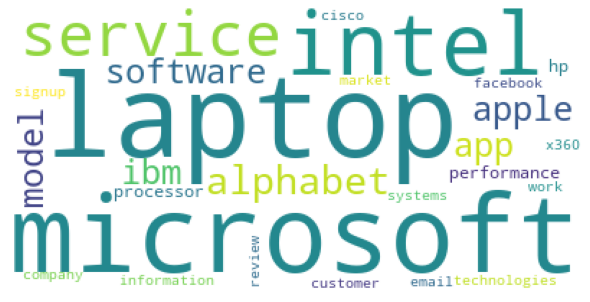

5
16
23
24
29
30
35
40
47
52
59
60
65
66
71
72
73
76
80
85
88
93
96
99
['Trying to Place a Value on Berkshire Hathaway - Yahoo Finance, Should You Consider Investing in Warren Buffett’s Berkshire Hathaway (BRK-A)? - Yahoo Finance, Buffetts Berkshire Taps Yen Debt With $1.5 Billion Offering - Bloomberg, Berkshire Hathaway Inc. Cl B stock rises Monday, outperforms market - MarketWatch, Berkshire Hathaway B (BRK.B) Stock Moves -0.24%: What You Should Know - Yahoo Finance, Berkshire Hathaway B (BRK.B) Up 5.4% Since Last Earnings Report: Can It Continue? - Yahoo Finance', 'JPMorgan Chase & Co. stock underperforms Friday when compared to competitors despite daily gains - MarketWatch, JPMorgan Chase CEO Jamie Dimon: Fintech is an enormous competitive threat to banks - CNBC, Goldman Sachs, JPMorgan Chase talk AI, cryptocurrency, digitization amid strong first quarters - ZDNet, Goldman, JPMorgan Chase stick it to the WallStreetBets crowd with knockout trading results - Fortune, JPMorgan Chase t

In [195]:
def getKeywords(s):
    s = str(s)
    s = s.replace('[','')
    s = s.replace(']','')
    s = s.replace("'","")
#     s = s.replace(',','')
    return s

from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
keywords = []
for i,row in overall_df.iterrows():
    if row['sector'] == 'Retailing':
        print(i)
        k = getKeywords(row['max_news_keywords'])
        keywords.append(k)
        
print(keywords)

wordcloud = WordCloud(background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(' '.join(keywords))
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

keywords = []
for i,row in overall_df.iterrows():
    if row['sector'] == 'Energy':
        print(i)
        k = getKeywords(row['min_news_keywords'])
        keywords.append(k)
        
print(keywords)

wordcloud = WordCloud(background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(' '.join(keywords))
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

keywords = []
for i,row in overall_df.iterrows():
    if row['sector'] == 'Technology':
        print(i)
        k = getKeywords(row['min_twit_text'])
        keywords.append(k)
        
print(keywords)

# wordcloud = WordCloud(background_color ='white',
#                 stopwords = stopwords,
#                 min_font_size = 10).generate(' '.join(keywords))
  
# # plot the WordCloud image                       
# plt.figure(figsize = (8, 8), facecolor = None)
# plt.imshow(wordcloud)
# plt.axis("off")
# plt.tight_layout(pad = 0)
  
# plt.show()
keywords = []
for i,row in overall_df.iterrows():
    if row['sector'] == 'Technology':
        print(i)
        k = getKeywords(row['max_news_keywords'])
        keywords.append(k)
        
print(keywords)

wordcloud = WordCloud(background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(' '.join(keywords))
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

keywords = []
for i,row in overall_df.iterrows():
    if row['sector'] == 'Financials':
        print(i)
        k = getKeywords(row['max_news_title']) + ", " + getKeywords(row['min_news_title'])
        keywords.append(k)
        
print(keywords)

# wordcloud = WordCloud(background_color ='white',
#                 stopwords = stopwords,
#                 min_font_size = 10).generate(' '.join(keywords))
  
# # plot the WordCloud image                       
# plt.figure(figsize = (8, 8), facecolor = None)
# plt.imshow(wordcloud)
# plt.axis("off")
# plt.tight_layout(pad = 0)
  
# plt.show()
keywords = []
for i,row in overall_df.iterrows():
    if row['sector'] == 'Retailing':
        print(i)
        k = getKeywords(row['max_twit_text'])
        keywords.append(k)
        
print(keywords)